In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d

[]

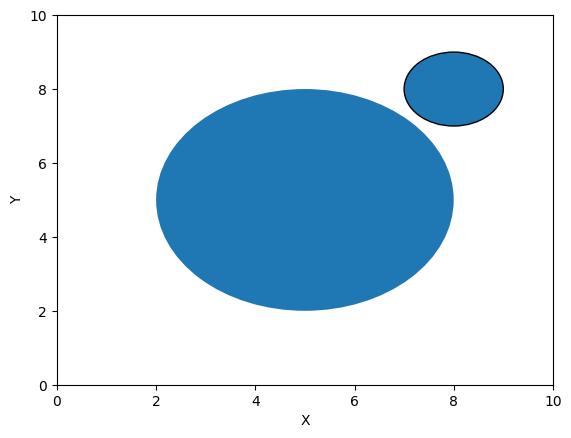

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = Circle((5, 5), 3)
ax.add_patch(p)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel('X')
ax.set_ylabel('Y')

angle=np.pi / 2
xn = 8
yn = 8
trans = Affine2D().rotate(angle).translate(xn, yn)

p1 = PathPatch(trans.transform_path(p.get_path()))
ax.add_patch(p1)
plt.plot()

[]

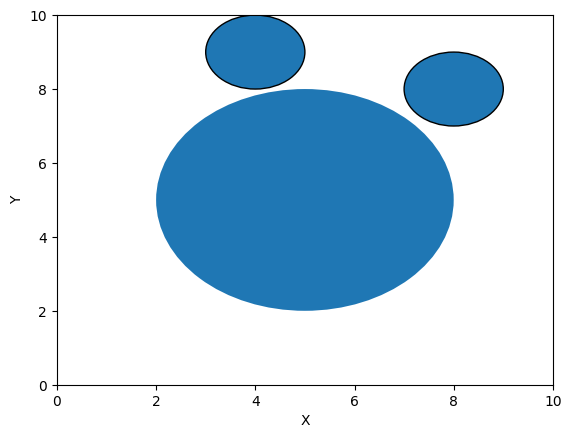

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = Circle((5, 5), 3)
ax.add_patch(p)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel('X')
ax.set_ylabel('Y')

angle=np.pi / 2
xn = 8
yn = 8
trans = Affine2D().rotate(angle).translate(xn, yn)
p1 = PathPatch(trans.transform_path(p.get_path()))
ax.add_patch(p1)

angle=np.pi / 4
xn = 4
yn = 9
trans = Affine2D().rotate(angle).translate(xn, yn)
p1 = PathPatch(trans.transform_path(p.get_path()))
ax.add_patch(p1)

plt.plot()

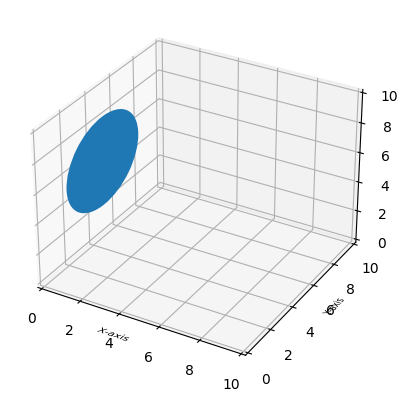

In [20]:
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    """
    Plots the string *s* on the Axes *ax*, with position *xyz*, size *size*,
    and rotation angle *angle*. *zdir* gives the axis which is to be treated as
    the third dimension. *usetex* is a boolean indicating whether the string
    should be run through a LaTeX subprocess or not.  Any additional keyword
    arguments are forwarded to `.transform_path`.

    Note: zdir affects the interpretation of xyz.
    """
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((5, 5), 3)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

# Manually label the axes
text3d(ax, (4, -2, 0), "X-axis", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (12, 4, 0), "Y-axis", zdir="z", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")
text3d(ax, (12, 10, 4), "Z-axis", zdir="y", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")



ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

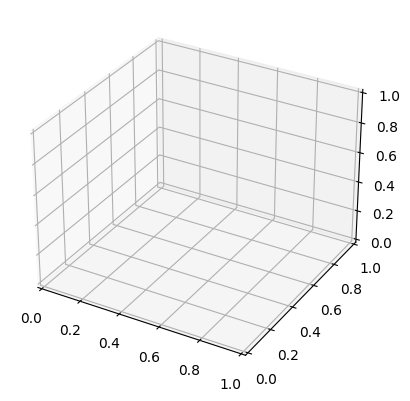

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d


def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    """
    Plots the string *s* on the Axes *ax*, with position *xyz*, size *size*,
    and rotation angle *angle*. *zdir* gives the axis which is to be treated as
    the third dimension. *usetex* is a boolean indicating whether the string
    should be run through a LaTeX subprocess or not.  Any additional keyword
    arguments are forwarded to `.transform_path`.

    Note: zdir affects the interpretation of xyz.
    """
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((5, 5), 3)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

# Manually label the axes
text3d(ax, (4, -2, 0), "X-axis", zdir="z", size=.5, usetex=False,
       ec="none", fc="k")
text3d(ax, (12, 4, 0), "Y-axis", zdir="z", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")
text3d(ax, (12, 10, 4), "Z-axis", zdir="y", size=.5, usetex=False,
       angle=np.pi / 2, ec="none", fc="k")

# Write a Latex formula on the z=0 'floor'
text3d(ax, (1, 5, 0),
       r"$\displaystyle G_{\mu\nu} + \Lambda g_{\mu\nu} = "
       r"\frac{8\pi G}{c^4} T_{\mu\nu}  $",
       zdir="z", size=1, usetex=True,
       ec="none", fc="k")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()